In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
import statsmodels.api as sm
#import our data for correlatin analys in python with dataframe

In [3]:
df=pd.DataFrame(pd.read_csv ('C:/Users/borsh/OneDrive/Рабочий стол/BI/projects/ForestlyActivitiesProject/project data/data-1760379126636.csv'))
df.head(10)    

,wood_fuel_cost,year,industrial_rw_cost
0,478.616000,2018,1390.204000
1,488.376000,2019,1404.528000
2,450.210271,2020,1316.084700
3,568.388960,2021,2290.164254
4,814.320000,2022,2823.324000
5,911.826630,2023,2649.323396
6,906.448000,2024,2887.800112


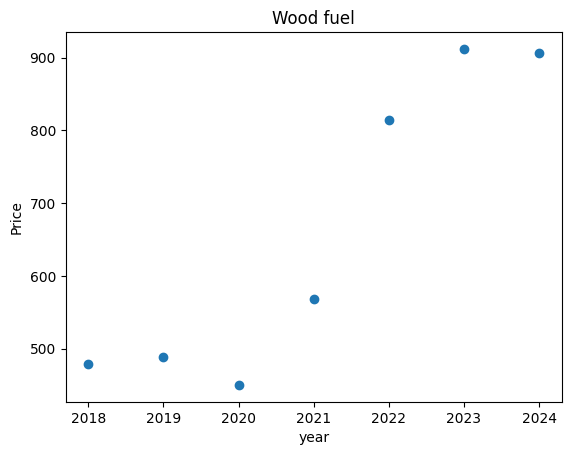

In [4]:
#show the plot to look at the data 
plt.scatter(x=df['year'],y=df['wood_fuel_cost'])
plt.title('Wood fuel')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()


In [5]:
#let's look at correlation 
df.corr()

,wood_fuel_cost,year,industrial_rw_cost
wood_fuel_cost,1.000000,0.919716,0.932493
year,0.919716,1.000000,0.913707
industrial_rw_cost,0.932493,0.913707,1.000000


We can see high correaltion of wood fuel price by the time 

## Building regression model 

In [6]:

x=sm.add_constant(df['year'])
y=df['wood_fuel_cost']
ols_basic= sm.OLS(y,x).fit()
print(ols_basic.summary())

                            OLS Regression Results                            
Dep. Variable:         wood_fuel_cost   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     27.44
Date:                Thu, 30 Oct 2025   Prob (F-statistic):            0.00336
Time:                        16:36:00   Log-Likelihood:                -40.253
No. Observations:                   7   AIC:                             84.51
Df Residuals:                       5   BIC:                             84.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.794e+05   3.44e+04     -5.219      0.0

C:\Users\borsh\PycharmProjects\PythonProject\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Now we can see  that p-value smaller that 0.05 that mean that hypothese is could be refuted and relation is exist 

In [10]:
#Now let's derive the regression formula with numpy
reg=np.polyfit(df['year'],df['wood_fuel_cost'],deg=1)
reg
b1=reg[0]
b0=reg[1]
print(b1,b0)

89.08953529930038 -179390.21000266212


that's means that your regression representating by the equation= b1*['year']+ b0

## Confidence interval 

In [11]:
pred = ols_basic.get_prediction(x)
pred_summary = pred.summary_frame(alpha = 0.5)
print(pred_summary[['mean','mean_ci_lower','mean_ci_upper']])

         mean  mean_ci_lower  mean_ci_upper
0  392.472231     347.912665     437.031797
1  481.561767     446.606367     516.517166
2  570.651302     543.016632     598.285972
3  659.740837     635.023637     684.458037
4  748.830373     721.195703     776.465042
5  837.919908     802.964508     872.875307
6  927.009443     882.449877     971.569009


We get the interval where accurate value is located, its get more accurancy for our analysis  

## Prediction interval 

In [12]:
pred = ols_basic.get_prediction(x)
pred_summary = pred.summary_frame(alpha = 0.5)
print(pred_summary[['mean','mean_ci_lower','mean_ci_upper']])

         mean  mean_ci_lower  mean_ci_upper
0  392.472231     347.912665     437.031797
1  481.561767     446.606367     516.517166
2  570.651302     543.016632     598.285972
3  659.740837     635.023637     684.458037
4  748.830373     721.195703     776.465042
5  837.919908     802.964508     872.875307
6  927.009443     882.449877     971.569009


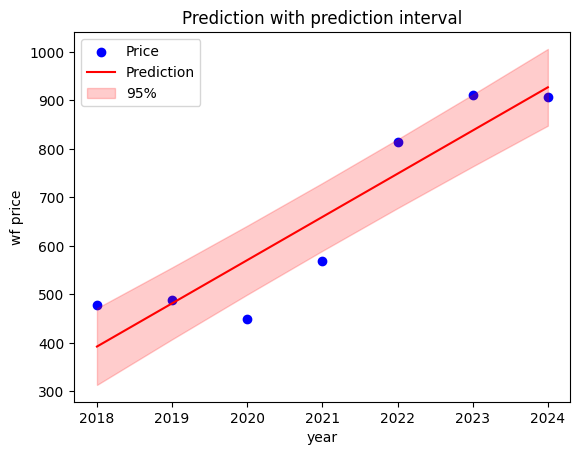

In [13]:
plt.scatter(df['year'],df['wood_fuel_cost'],color ='blue',label = 'Price')
plt.plot(x['year'],pred_summary['mean'],color ='red', label = 'Prediction')
plt.fill_between(x['year'], pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'],color = 'red', alpha =0.2, label = '95%')
plt.xlabel('year')
plt.ylabel('wf price')
plt.title('Prediction with prediction interval')
plt.legend()
plt.show()

## Get prediction for the next 3 years 

In [23]:
X=sm.add_constant((pd.concat([df['year'],pd.Series([2025,2026,2027])])))
prediction= ols_basic.get_prediction(X)
forecast=prediction.summary_frame(alpha=0.05)
forecast.index = X[0]
print(forecast[['mean','mean_ci_lower','mean_ci_upper','obs_ci_lower','obs_ci_upper']])

             mean  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0                                                                          
2018   392.472231     234.847235     550.097228    112.544876    672.399587
2019   481.561767     357.910546     605.212987    219.257917    743.865616
2020   570.651302     472.896429     668.406175    319.514486    821.788118
2021   659.740837     572.306221     747.175454    412.438397    907.043278
2022   748.830373     651.075500     846.585245    497.693557    999.967188
2023   837.919908     714.268687     961.571128    575.616059   1100.223757
2024   927.009443     769.384447    1084.634439    647.082087   1206.936799
2025  1016.098978     820.589233    1211.608724    713.216582   1318.981374
2026  1105.188514     869.763604    1340.613423    775.130075   1435.246953
2027  1194.278049     917.785515    1470.770583    833.775890   1554.780208
